In [1]:
import uproot

import uproot3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'uproot3'

In [10]:
cabinetry.__version__

'0.4.0'

In [71]:
test = uproot.open("example.root")["tree"]

In [77]:
t=test.arrays()

In [83]:
type(t)

awkward.highlevel.Array

In [64]:
list(f)

['MET_met',
 'event',
 'run',
 'luminosityBlock',
 'HLT_QuadJet40_IsoPFTau40',
 'HLT_QuadJet45_IsoPFTau45',
 'PV_npvs',
 'genEvent_tmeme',
 'norm',
 'norm_up',
 'norm_down',
 'trigger_weight',
 'trigger_weight_up',
 'trigger_weight_down',
 'trigger_is40',
 'isSignal',
 'isBkg',
 'btag_weight1',
 'btag_weight1_up',
 'btag_weight1_down',
 'btag_weight2',
 'btag_weight2_up',
 'btag_weight2_down',
 'pdf',
 'pdf_up',
 'pdf_down',
 'h',
 'ht',
 'h_jet',
 'ht_jet',
 'chargeEta',
 'mTauJet',
 'mt',
 'deltaPhiTauMet',
 'nJets',
 'aplanarity',
 'sphericity',
 'train_flag',
 'label',
 'bdt']

In [39]:
t = test.arrays()

In [40]:
t[0]

<Record {event: 1.22e+05, bdt: 1.22e+05} type='{"event": float32, "bdt": float32}'>

In [47]:
import uproot3
import pandas as pd

In [187]:
sample_names = ["Data", "TTJets_bkg", "WZJets", "STJets", "QCD", "TTJets_signal",
                "TTJets_signal_06_jes_up", "TTJets_signal_06_jes_down"]
for s in sample_names:
    sample = pd.read_hdf("/home/centos/data/bdt_rs5/" + s + ".h5")
    
    if s == "Data":
        sample['weight'] = 1.
    elif s == "QCD":
        scale_qcd = 4.
        sample['weight'] = sample['btag_weight2'] * scale_qcd
    else:
        sample['weight'] = sample['norm'] * sample['trigger_weight'] * sample['btag_weight1']

    file = uproot3.recreate("data2/" + s + ".root")
    file["tree"] = uproot3.newtree(
        {
        "bdt": np.float32,
        "weight": np.float32,    
        "event": np.float32
        }
    )    
    file["tree"].extend({
    "bdt": sample["bdt"].values ,
    "weight": sample["weight"].values ,
    "event": sample["event"].values
    })
    file.close()

In [186]:
file = uproot3.recreate("example.root")

In [67]:
file["tree"] = uproot3.newtree(
    {
    "bdt": np.float32,
    "event": np.float32
    }
)

In [69]:
file["tree"].extend({
    "bdt": f["bdt"].values ,
    "event": f["event"].values
})

In [70]:
file.close()

In [50]:
import numpy as np
bins = np.linspace(0,1,10)

In [188]:
import cabinetry
import pyhf

In [189]:
config = {
   "General":{
      "Measurement": "PyHEP_cabinetry",
      "POI": "Signal_norm",               # parameter of interest, which we want to measure 
      "InputPath": "data2/{SamplePath}", # where to find input data
      "HistogramFolder": "histograms/"
   }
}

In [190]:
config.update({
   "Regions":[
      {
         "Name": "Signal_region",
         "Variable": "bdt",                 # which variable we bin histograms in
         "Binning": list(bins), #[0,0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
         "Filter": "bdt > -1"           # event selection 

      }
   ]
})

In [191]:
config.update({
   "Samples":[
      {
         "Name": "Data",
         "Tree": "tree",
         "SamplePath": "Data.root",
         "Data": True                       # observed data is handled differently, need to distinguish
      },
      {
         "Name": "Signal",
         "Tree": "tree",
         "SamplePath": "TTJets_signal.root",
         "Weight": "weight"
      },
      {
         "Name": "QCD",
         "Tree": "tree",
         "SamplePath": "QCD.root",
         "Weight": "weight"
      },
      {
         "Name": "TTJets_bkg",
         "Tree": "tree",
         "SamplePath": "TTJets_bkg.root",
         "Weight": "weight"
      },
      {
         "Name": "WZJets",
         "Tree": "tree",
         "SamplePath": "WZJets.root",
         "Weight": "weight"
      },
      {
         "Name": "STJets",
         "Tree": "tree",
         "SamplePath": "STJets.root",
         "Weight": "weight"
      }

   ]
})


In [192]:
config.update({"Systematics":[
    {
    "Name": "Signal_modeling",
        "Up": {"SamplePath": "TTJets_signal_06_jes_up.root", 
               #"Tree": "tree", "Weight": "weight"
              },
        "Down": {"SamplePath": "TTJets_signal_06_jes_down.root", 
                 #"Tree": "tree", "Weight": "weight"
                },
        "Type" : "NormPlusShape",
        "Samples": "Signal"
    }
    ]
    }
)

In [193]:
config

{'General': {'Measurement': 'PyHEP_cabinetry',
  'POI': 'Signal_norm',
  'InputPath': 'data2/{SamplePath}',
  'HistogramFolder': 'histograms/'},
 'Regions': [{'Name': 'Signal_region',
   'Variable': 'bdt',
   'Binning': [0.0,
    0.1111111111111111,
    0.2222222222222222,
    0.3333333333333333,
    0.4444444444444444,
    0.5555555555555556,
    0.6666666666666666,
    0.7777777777777777,
    0.8888888888888888,
    1.0],
   'Filter': 'bdt > -1'}],
 'Samples': [{'Name': 'Data',
   'Tree': 'tree',
   'SamplePath': 'Data.root',
   'Data': True},
  {'Name': 'Signal',
   'Tree': 'tree',
   'SamplePath': 'TTJets_signal.root',
   'Weight': 'weight'},
  {'Name': 'QCD',
   'Tree': 'tree',
   'SamplePath': 'QCD.root',
   'Weight': 'weight'},
  {'Name': 'TTJets_bkg',
   'Tree': 'tree',
   'SamplePath': 'TTJets_bkg.root',
   'Weight': 'weight'},
  {'Name': 'WZJets',
   'Tree': 'tree',
   'SamplePath': 'WZJets.root',
   'Weight': 'weight'},
  {'Name': 'STJets',
   'Tree': 'tree',
   'SamplePath'

In [68]:
{'Name': 'Modeling',\n",
       "  'Up': {'Path': 'ntuples/prediction.root', 'Tree': 'background_varied'},\n",
       "  'Down': {'Symmetrize': True},\n",
       "  'Samples': 'Background',\n",
       "  'Type': 'NormPlusShape'},\n",

SyntaxError: unexpected character after line continuation character (1709197770.py, line 1)

In [194]:
config.update({
   "NormFactors":[
      {
         "Name": "Signal_norm",
         "Samples": "Signal",    # we want this parameter to scale the signal
         "Nominal": 1,
         "Bounds": [-5, 10]
      },
      {
         "Name": "QCD_norm",
         "Samples": "QCD",    # we want this parameter to scale the signal
         "Nominal": 1,
         "Bounds": [0.5, 1.5]
      }
   ]
})


In [195]:
config

{'General': {'Measurement': 'PyHEP_cabinetry',
  'POI': 'Signal_norm',
  'InputPath': 'data2/{SamplePath}',
  'HistogramFolder': 'histograms/'},
 'Regions': [{'Name': 'Signal_region',
   'Variable': 'bdt',
   'Binning': [0.0,
    0.1111111111111111,
    0.2222222222222222,
    0.3333333333333333,
    0.4444444444444444,
    0.5555555555555556,
    0.6666666666666666,
    0.7777777777777777,
    0.8888888888888888,
    1.0],
   'Filter': 'bdt > -1'}],
 'Samples': [{'Name': 'Data',
   'Tree': 'tree',
   'SamplePath': 'Data.root',
   'Data': True},
  {'Name': 'Signal',
   'Tree': 'tree',
   'SamplePath': 'TTJets_signal.root',
   'Weight': 'weight'},
  {'Name': 'QCD',
   'Tree': 'tree',
   'SamplePath': 'QCD.root',
   'Weight': 'weight'},
  {'Name': 'TTJets_bkg',
   'Tree': 'tree',
   'SamplePath': 'TTJets_bkg.root',
   'Weight': 'weight'},
  {'Name': 'WZJets',
   'Tree': 'tree',
   'SamplePath': 'WZJets.root',
   'Weight': 'weight'},
  {'Name': 'STJets',
   'Tree': 'tree',
   'SamplePath'

In [196]:
cabinetry.configuration.validate(config)

True

In [197]:
config

{'General': {'Measurement': 'PyHEP_cabinetry',
  'POI': 'Signal_norm',
  'InputPath': 'data2/{SamplePath}',
  'HistogramFolder': 'histograms/'},
 'Regions': [{'Name': 'Signal_region',
   'Variable': 'bdt',
   'Binning': [0.0,
    0.1111111111111111,
    0.2222222222222222,
    0.3333333333333333,
    0.4444444444444444,
    0.5555555555555556,
    0.6666666666666666,
    0.7777777777777777,
    0.8888888888888888,
    1.0],
   'Filter': 'bdt > -1'}],
 'Samples': [{'Name': 'Data',
   'Tree': 'tree',
   'SamplePath': 'Data.root',
   'Data': True},
  {'Name': 'Signal',
   'Tree': 'tree',
   'SamplePath': 'TTJets_signal.root',
   'Weight': 'weight'},
  {'Name': 'QCD',
   'Tree': 'tree',
   'SamplePath': 'QCD.root',
   'Weight': 'weight'},
  {'Name': 'TTJets_bkg',
   'Tree': 'tree',
   'SamplePath': 'TTJets_bkg.root',
   'Weight': 'weight'},
  {'Name': 'WZJets',
   'Tree': 'tree',
   'SamplePath': 'WZJets.root',
   'Weight': 'weight'},
  {'Name': 'STJets',
   'Tree': 'tree',
   'SamplePath'

In [198]:
cabinetry.templates.build(config, method="uproot")

In [199]:
!ls -lt histograms/

total 60
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_STJets.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_WZJets.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_TTJets_bkg.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_QCD.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_Signal_Signal_modeling_Down.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_Signal_Signal_modeling_Up.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_Signal.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:51 Signal_region_Data.npz
-rw-rw-r-- 1 centos centos 972 Nov 19 17:06 Signal_region_Background.npz
-rw-rw-r-- 1 centos centos 876 Sep  8 12:12 Signal_region_Background_Nominal_modified.npz
-rw-rw-r-- 1 centos centos 876 Sep  8 12:12 Signal_region_Signal_Nominal_modified.npz
-rw-rw-r-- 1 centos centos 876 Sep  8 12:12 Signal_region_Data_Nominal_modified.npz
-rw-rw-r-- 1 centos centos 876 Sep  8 12:10 Signal_region_Backgroun

In [177]:
cabinetry.configuration.print_overview(config)

In [178]:
#cabinetry.template_postprocessor.run(config)

In [179]:
#cabinetry.visualize.data_MC_from_histograms(config)

In [200]:
workspace_path = "PyHEP_workspace.json"
ws = cabinetry.workspace.build(config)
cabinetry.workspace.save(ws, workspace_path)

the modified histogram histograms/Signal_region_Signal_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_Signal_Signal_modeling_Up_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_Signal_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_Signal_Signal_modeling_Down_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_QCD_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_TTJets_bkg_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_WZJets_modified.npz does not exist
loading the un-modified histogram instead!
the modified histogram histograms/Signal_region_STJets_modified.npz does not 

In [128]:
ws

{'channels': [{'name': 'Signal_region',
   'samples': [{'name': 'Signal',
     'data': [3.9402451990172267,
      11.574440160067752,
      16.355582057498395,
      23.32741598598659,
      25.948222141014412,
      27.39036282314919,
      28.65352308587171,
      45.622515368508175,
      165.64022055873647],
     'modifiers': [{'name': 'staterror_Signal_region',
       'type': 'staterror',
       'data': [0.17750151670948705,
        0.3038113934656942,
        0.36586845498008463,
        0.4374852660328917,
        0.45995709758907954,
        0.474752464242868,
        0.4875660284716018,
        0.6150626541604653,
        1.1815705111973267]},
      {'data': None, 'name': 'Signal_norm', 'type': 'normfactor'},
      {'name': 'Signal_modeling',
       'type': 'normsys',
       'data': {'hi': 1.0376600915623995, 'lo': 0.9418028877873506}},
      {'name': 'Signal_modeling',
       'type': 'histosys',
       'data': {'hi_data': [4.357767744479887,
         12.300256017698622,
     

In [201]:
# apply pruning: make a pyhf workspace, prune all staterror modifiers, return the workspace specification again
spec = dict(pyhf.Workspace(ws).prune(modifier_types=["staterror"]))

In [202]:
model, data = cabinetry.model_utils.model_and_data(spec)

In [207]:
model, data = cabinetry.model_utils.model_and_data(spec, asimov=True)

In [208]:
model

In [209]:
fit_results = cabinetry.fit.fit(model, data)

In [210]:
fit_results

FitResults(bestfit=array([1.00000001e+00, 2.49361197e-09, 1.00000000e+00]), uncertainty=array([0.08874568, 0.82984693, 0.02172565]), labels=['Signal_norm', 'Signal_modeling', 'QCD_norm'], corr_mat=array([[ 1.        , -0.01885168, -0.25892653],
       [-0.01885168,  1.        , -0.21626001],
       [-0.25892653, -0.21626001,  1.        ]]), best_twice_nll=69.25564809678262, goodness_of_fit=-1)

In [28]:
cabinetry.fit.print_results(fit_results)

In [29]:
fit_results.bestfit

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [211]:
scan_results = cabinetry.fit.scan(model, data, "Signal_norm")

W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line


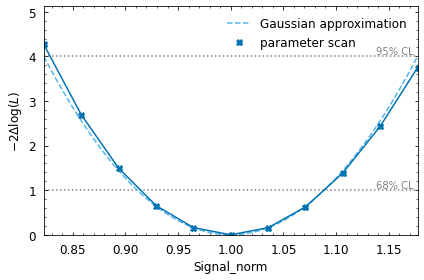

In [212]:
cabinetry.visualize.scan(scan_results)

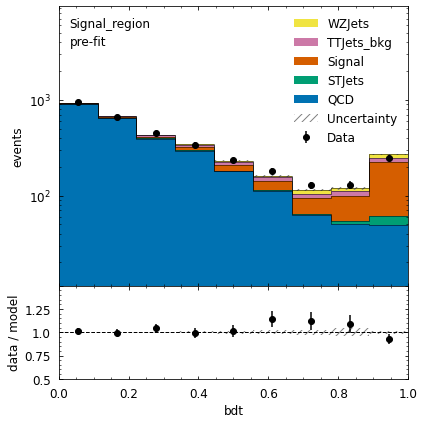

In [205]:
model_pred = cabinetry.model_utils.prediction(model)
figures = cabinetry.visualize.data_mc(model_pred, data, config=config, log_scale=True)

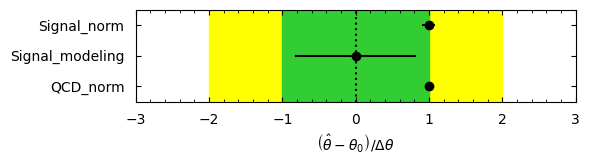

In [213]:
cabinetry.visualize.pulls(fit_results)